# 🚀 Identify Spatial Neighbourhoods on Expression Data

As mentioned earlier, `spatial_count` and `spatial_lda` are tailored for categorical data, specifically cell phenotypes. But what if cell types haven't been defined and there's a need to discern cellular neighborhoods directly from expression data? This approach carries both pros and cons. On the upside, there's no prerequisite to define cell types. However, interpreting neighborhoods can become challenging without defined cell types, and the method may be susceptible to batch effects. A significant advantage of working with categorical data is that, ideally, batch effects would have been addressed during the phenotyping stage, simplifying subsequent analyses.

In [1]:
# import packages
import scimap as sm
import anndata as ad

Running SCIMAP  1.3.14


In [2]:
# Load the data that we saved in the last tutorial (with ROIs added)
adata = ad.read_h5ad('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')

In [3]:
# make sure you drop markers that are background or antibodies that did not work as all these can affect your results
adata = sm.tl.spatial_expression(adata, method='radius', radius=80, label='spatial_expression')

Identifying neighbours within 80 pixels of every cell


In [4]:
# note that the df_name parameter needs to the same as the label used in the previous step.
adata = sm.tl.spatial_cluster(adata, df_name='spatial_expression', method='kmeans', k=6, label='spatial_expression_kmeans')

Kmeans clustering


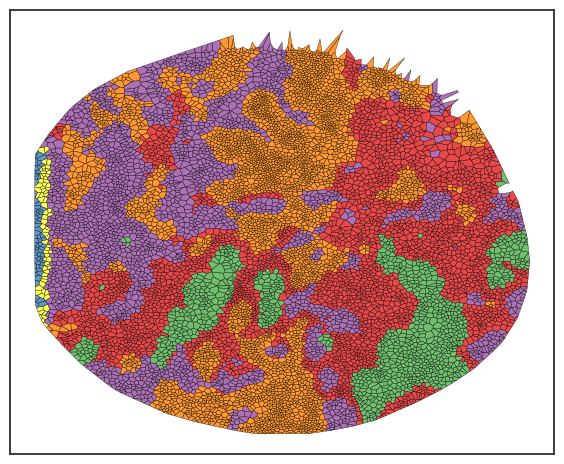

In [5]:
# Let's visualize the results.
sm.pl.voronoi(adata, color_by='spatial_expression_kmeans', 
                 voronoi_edge_color = 'black',
                 voronoi_line_width = 0.3, 
                 voronoi_alpha = 0.8, 
                 size_max=3000,
                 overlay_points=None, 
                 plot_legend=True, 
                 legend_size=6)

Now, please return to the tutorials for `spatial_count` and `spatial_lda` to continue. The steps for understanding neighborhoods follow the same principles outlined there.

### Save Results

In [6]:
# Save the results
adata.write('/Users/aj/Dropbox (Partners HealthCare)/nirmal lab/resources/exemplarData/scimapExampleData/scimapExampleData.h5ad')